## Code Execution

Depict basketball tournament results.

In [1]:
#%sudo apt-get install graphviz

In [2]:
#%pip install --quiet python-graphviz

In [3]:
GEMINI="gemini-2.0-flash"
OPENAI="gpt-4o-mini"
CLAUDE="claude-3-7-sonnet-latest"

import os
from dotenv import load_dotenv
load_dotenv("../keys.env")
assert os.environ["GEMINI_API_KEY"][:2] == "AI",\
       "Please specify the GEMINI_API_KEY access token in keys.env file"
#assert os.environ["ANTHROPIC_API_KEY"][:2] == "sk",\
#       "Please specify the ANTHROPIC_API_KEY access token in keys.env file"
#assert os.environ["OPENAI_API_KEY"][:2] == "sk",\
#       "Please specify the OPENAI_API_KEY access token in keys.env file"

In [4]:
# Needed in Jupyter environment See: https://ai.pydantic.dev/troubleshooting/ 
import nest_asyncio
nest_asyncio.apply()
def zero_shot(prompt: str, model_id=GEMINI) -> str:
    from pydantic_ai import Agent
    agent = Agent(model_id, 
                  model_settings = {
                      "temperature": 0   # temperature=0 for precise code creation
                  }) 
    result = agent.run_sync(prompt)
    return (result.data)

## Graphviz illustration

In [5]:
%%writefile example.dot
digraph tournament  {
   subgraph cluster_elite_eight {
       label = "Elite Eight"
       subgraph cluster_mar29 {
           label = "March 29, 2025"
           mar29_winner1 [style=filled, label="Florida"];
           mar29_loser1 [label="Texas Tech"];
           mar29_winner1 -> mar29_loser1 [label="84-79"];
           
           mar29_winner2 [style=filled, label="Duke"];
           mar29_loser2 [label="Alabama"];
           mar29_winner2 -> mar29_loser2 [label="85-65"];
       }
       subgraph cluster_mar30 {
           label = "March 30, 2025"
           mar30_winner1 [style=filled, label="Houston"];
           mar30_loser1 [label="Tennessee"];
           mar30_winner1 -> mar30_loser1 [label="69-50"];
           
           mar30_winner2 [style=filled, label="Auburn"];
           mar30_loser2 [label="Michigan State"];
           mar30_winner2 -> mar30_loser2 [label="70-64"];
       }
   }
}

Overwriting example.dot


In [6]:
%%writefile example.dot
digraph tournament  {
       "Florida" -> "Texas Tech" [label="84-79"]
       "Duke" -> "Alabama" [label="85-65"]
       "Auburn" -> "Michigan State" [label="70-64"]
       "Houston" -> "Tennessee" [label="69-50"]
   subgraph cluster_elite_eight {
       label = "Elite Eight"
       {rank = same; "Texas Tech"; "Alabama"; "Michigan State"; "Tennessee"; }
   }
}

Overwriting example.dot


In [7]:
!dot -Tpng example.dot -o example.png

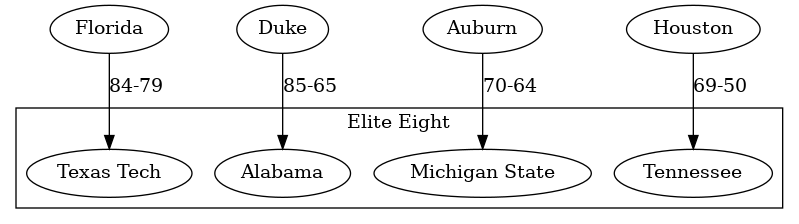

In [8]:
from IPython.display import Image as showImage
showImage(filename="example.png")

## 2025 Basketball results

Use local copy of data from ncaa.com
https://www.ncaa.com/news/basketball-men/mml-official-bracket/2025-04-06/latest-bracket-schedule-and-scores-2025-ncaa-mens-tournament

In [9]:
tournament_results="""
Monday, April 7, 2025 (National championship)
(1) Florida 65, (1) Houston 63

Tuesday, March 18, 2025 (First Four)
(16) Alabama State 70, (16) Saint Francis 68
(11) North Carolina 95, (11) San Diego State 68

Wednesday, March 19, 2025 (First Four)
(16) Mount St. Mary's 83, (16) American University 72
(11) Xavier 86, (11) Texas 80 

Thursday, March 20, 2025 (Round of 64)
(9) Creighton 89, (8) Louisville 75
(4) Purdue 75, (13) High Point 63
(3) Wisconsin 85, (14) Montana 66
(1) Houston 78, (16) SIU Edwardsville 40
(1) Auburn 83, (16) Alabama State 63
(12) McNeese 69, (5) Clemson 67
(6) BYU 80, (11) VCU 71
(8) Gonzaga 89, (9) Georgia 68 
(2) Tennessee 77, (15) Wofford 62
(10) Arkansas 79, (7) Kansas 72
(4) Texas A&M 80, (13) Yale 71
(11) Drake 67, (6) Missouri 57
(7) UCLA 72, (10) Utah State 47
(2) St. John's 83, (15) Omaha 53
(5) Michigan 68, (12) UC San Diego 65
(3) Texas Tech 82, (14) UNC Wilmington 72

Friday, March 21, 2025 (Round of 64)
(9) Baylor 75, (8) Mississippi State 72
(2) Alabama 90, (15) Robert Morris 81
(3) Iowa State 82, (14) Lipscomb 55
(12) Colorado State 78, (5) Memphis 70
(1) Duke 93, (16) Mount St. Mary's 49
(7) Saint Mary's 59, (10) Vanderbilt 56
(6) Ole Miss 71, (11) North Carolina 64
(4) Maryland 81, (13) Grand Canyon 49
(1) Florida 95, (16) Norfolk State 69
(3) Kentucky 76, (14) Troy 57
(10) New Mexico 75, (7) Marquette 66
(4) Arizona 93, (13) Akron 65
(8) UConn 67, (9) Oklahoma 59
(6) Illinois 86, (11) Xavier 73
(2) Michigan State 87, (15) Bryant 62
(5) Oregon 81, (12) Liberty 52

Saturday, March 22, 2025 (Round of 32)
(4) Purdue 76, (12) McNeese 62
(10) Arkansas 75, (2) St. John's 66
(5) Michigan 91, (4) Texas A&M 79 
(3) Texas Tech 77, (11) Drake 64
(1) Auburn 82, (9) Creighton 70
(6) BYU 91, (3) Wisconsin 89 
(1) Houston 81, (8) Gonzaga 76
(2) Tennessee 67, (7) UCLA 58

Sunday, March 23, 2025 (Round of 32)
(1) Florida 77, (8) UConn 75
(1) Duke 89, (9) Baylor 66
(3) Kentucky 84, (6) Illinois 75
(2) Alabama 80, (7) Saint Mary's 66
(4) Maryland 72, (12) Colorado State 71
(6) Ole Miss 91, (3) Iowa State 78
(2) Michigan State 71, (10) New Mexico 63
(4) Arizona 87, (5) Oregon 83

Thursday, March 27, 2025 (Sweet 16)
(2) Alabama 113, (6) BYU 88
(1) Florida 87, (4) Maryland 71
(1) Duke 100, (4) Arizona 93
(3) Texas Tech 85, (10) Arkansas 83 (OT)

Friday, March 28, 2025 (Sweet 16)
(2) Michigan State 73, (6) Ole Miss 70
(2) Tennessee 78, (3) Kentucky 65
(1) Auburn 78, (5) Michigan 65
(1) Houston 62, (4) Purdue 60

Saturday, March 29, 2025 (Elite Eight)
(1) Florida 84, (3) Texas Tech 79
(1) Duke 85, (2) Alabama 65

Sunday, March 30, 2025 (Elite Eight)
(1) Houston 69, (2) Tennessee 50
(1) Auburn 70, (2) Michigan State 64

Saturday, April 5, 2025 (Final Four)
(1) Florida 79, (1) Auburn 73
(1) Houston 70, (1) Duke 67
"""

In [10]:
output = zero_shot("""
I'll give you the results of a basketball tournament.
Use the data to generate a Graphviz subgraphs.
Make sure to name the subgraphs cluster_xxx

Here's an example:

**Input**:
Saturday, March 29, 2025 (Elite Eight)
(1) Florida 84, (3) Texas Tech 79
(1) Duke 85, (2) Alabama 65

Sunday, March 30, 2025 (Elite Eight)
(1) Houston 69, (2) Tennessee 50
(1) Auburn 70, (2) Michigan State 64

**Output**:
       "Florida" -> "Texas Tech" [label="84-79"]
       "Duke" -> "Alabama" [label="85-65"]
       "Auburn" -> "Michigan State" [label="70-64"]
       "Houston" -> "Tennessee" [label="69-50"]
   subgraph cluster_elite_eight {
       label = "Elite Eight"
       {rank = same; "Texas Tech"; "Alabama"; "Michigan State"; "Tennessee"; }
   }
""" + 
f"""
**Input**:
{tournament_results}

**Output**:
""")
print(output)

```
       "Florida" -> "Houston" [label="65-63"]
   subgraph cluster_national_championship_in_san_antonio {
       label = "National championship in San Antonio"
       {rank = same; "Houston"; }
   }
       "Alabama State" -> "Saint Francis" [label="70-68"]
       "North Carolina" -> "San Diego State" [label="95-68"]
   subgraph cluster_first_four_in_dayton_ohio {
       label = "First Four in Dayton, Ohio"
       {rank = same; "Saint Francis"; "San Diego State"; }
   }
       "Mount St. Mary's" -> "American University" [label="83-72"]
       "Xavier" -> "Texas" [label="86-80"]
   subgraph cluster_first_four_in_dayton_ohio {
       label = "First Four in Dayton, Ohio"
       {rank = same; "American University"; "Texas"; }
   }
       "Creighton" -> "Louisville" [label="89-75"]
       "Purdue" -> "High Point" [label="75-63"]
       "Wisconsin" -> "Montana" [label="85-66"]
       "Houston" -> "SIU Edwardsville" [label="78-40"]
       "Auburn" -> "Alabama State" [label="83-63"]
       "

In [11]:
dot_text = "digraph G {\n" + output.replace("```", "") + "}\n"
with open("tournament.dot", "w") as ofp:
    ofp.write(dot_text)

In [12]:
!dot -Grankdir=LR -Tpng tournament.dot -o tournament.png

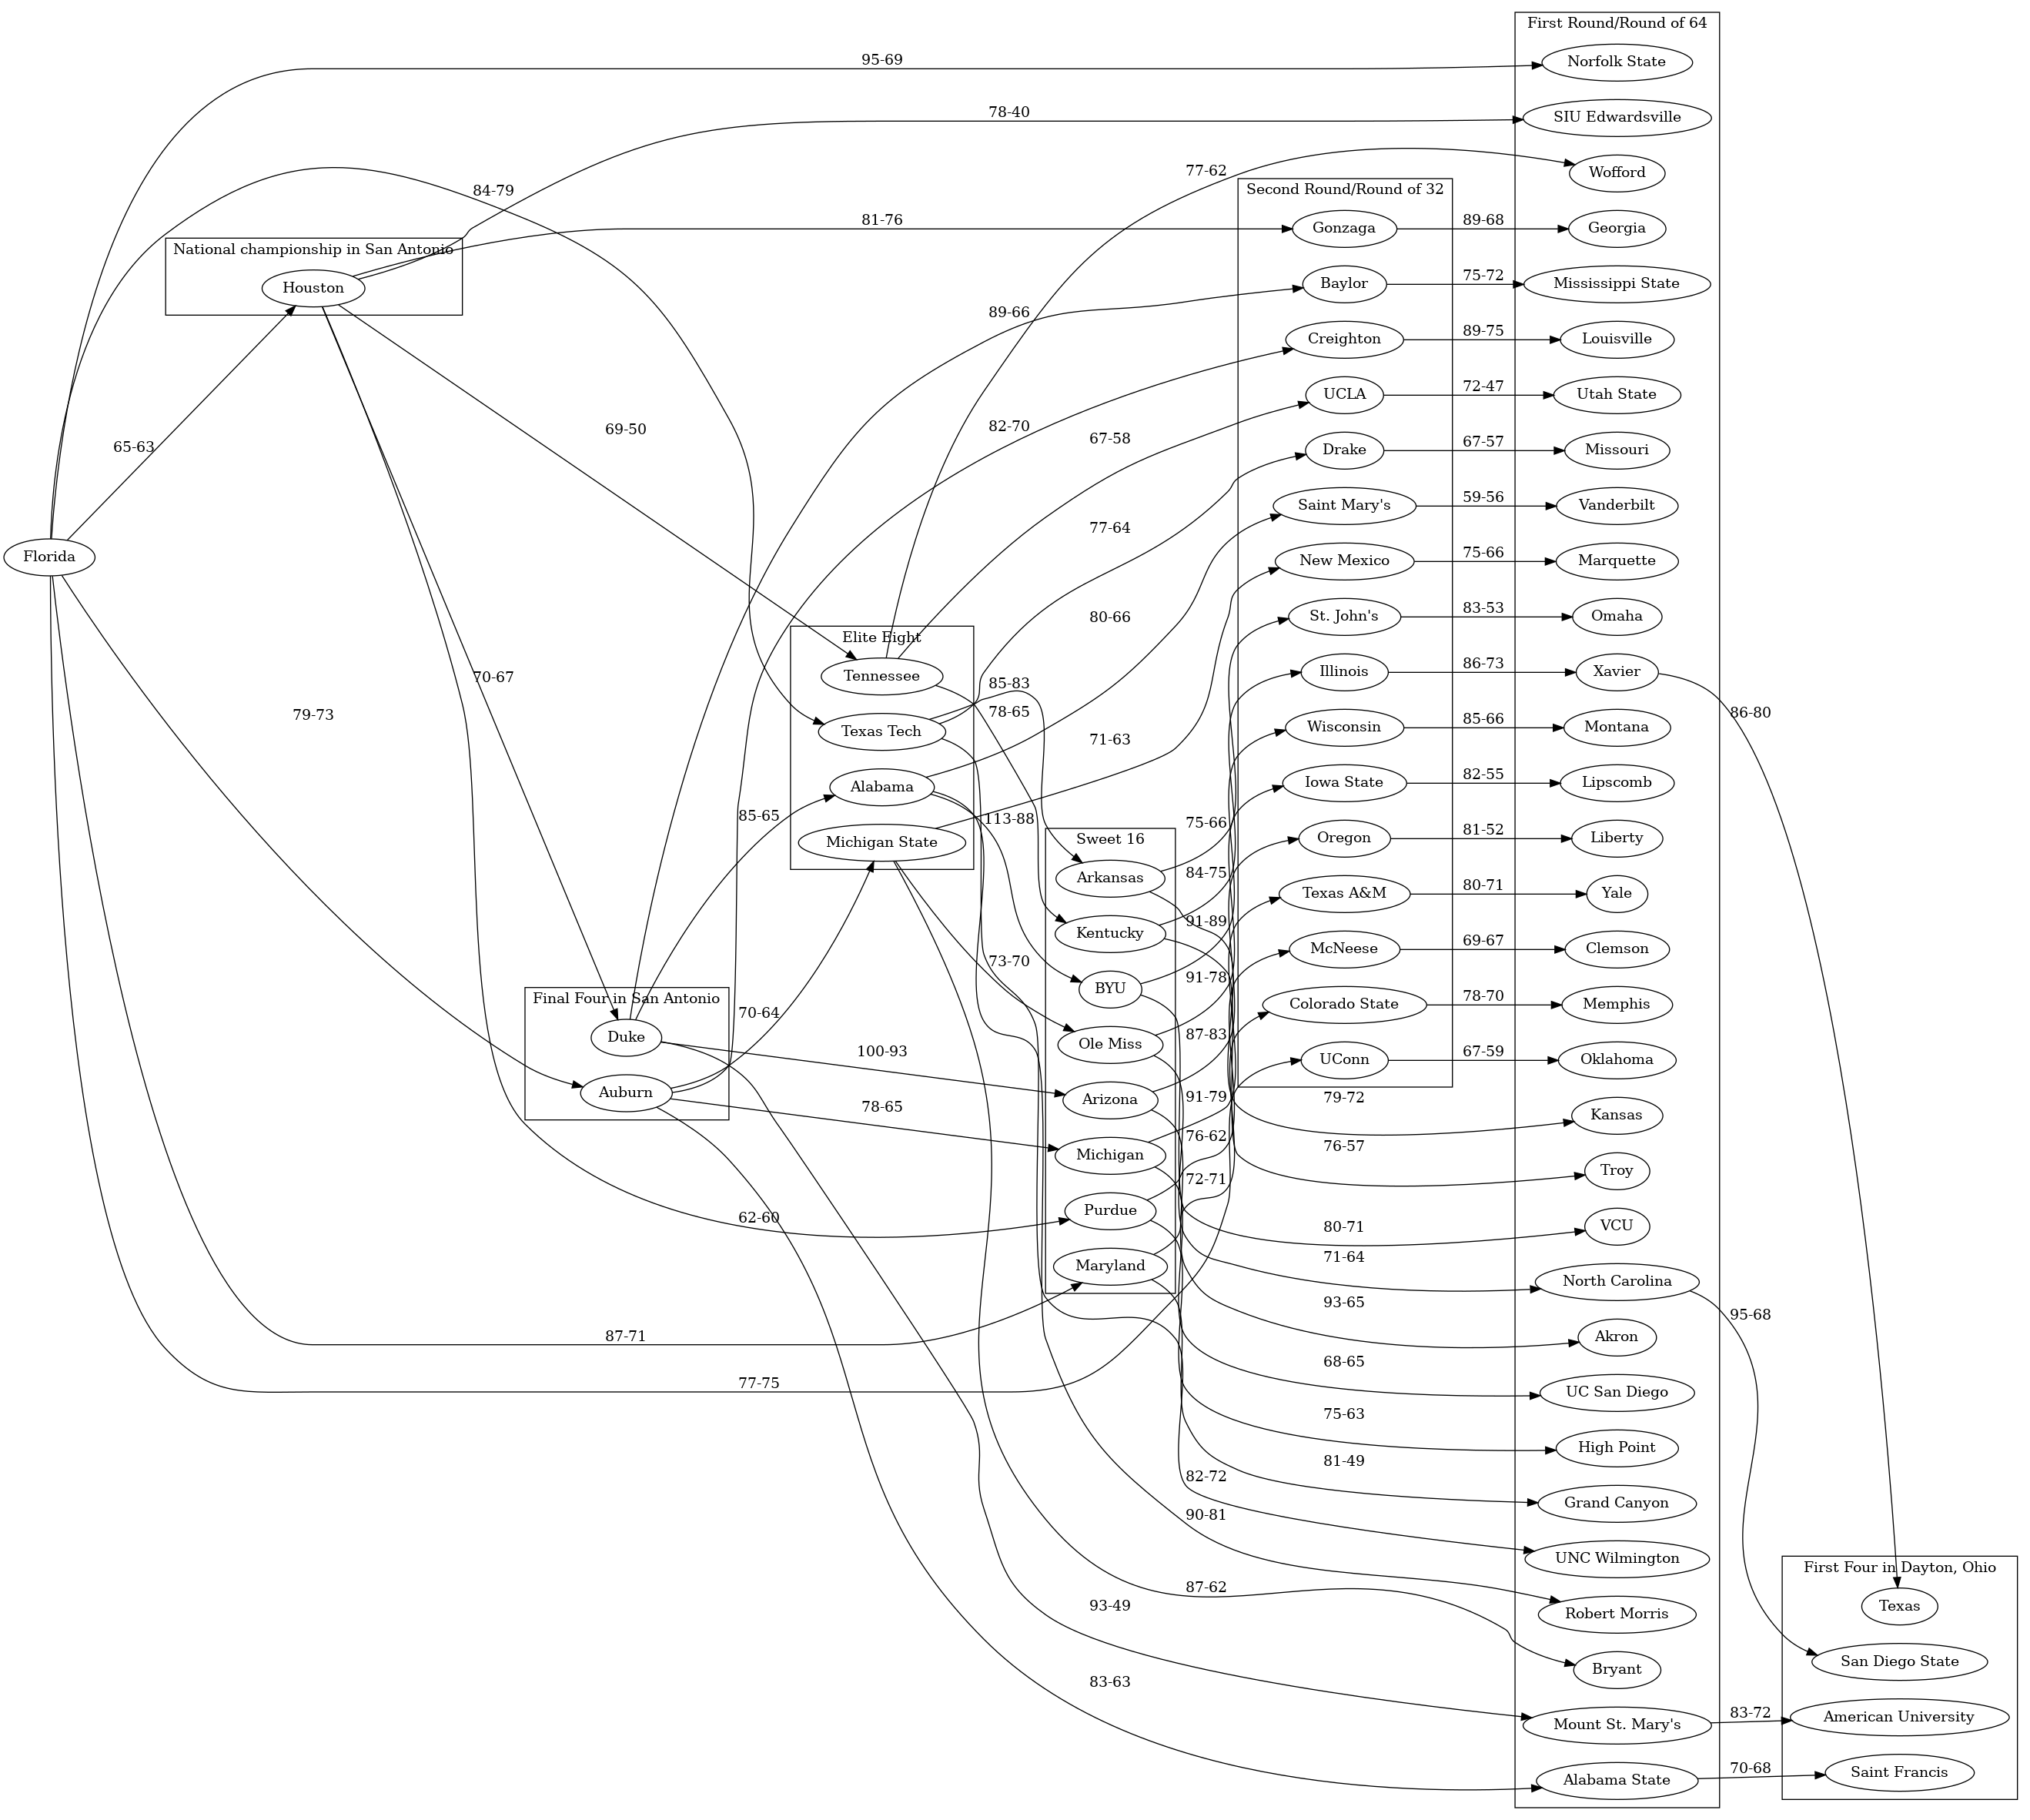

In [13]:
from IPython.display import Image as showImage
showImage(filename="tournament.png")